## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [16]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [17]:
#read data file into a dataframe
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [18]:
#number of rows for a dataframe
df.shape[0]

294478

c. The number of unique users in the dataset.

In [19]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [20]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [21]:
df.query('landing_page == "new_page" and group != "treatment"').count() + df.query('landing_page != "new_page" and group == "treatment"').count() 

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [23]:
# creating two temp dataframes and cancatenating into df2
df_tmp1 = df[(df['landing_page'] == "new_page") & (df['group'] == "treatment")]
df_tmp2 = df[(df['landing_page'] == "old_page") & (df['group'] == "control")]
frames = [df_tmp1, df_tmp2]
df2 = pd.concat(frames)

In [24]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [25]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [26]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [27]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [28]:
# Dropping duplicate row
df2.drop(2893, inplace=True)

In [29]:
#checking if the duplicate row is droppped
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [30]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [59]:
control_converted = df2[df2['group']=="control"]['converted'].mean()
control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [60]:
treatment_converted = df2[df2['group']=="treatment"]['converted'].mean()
treatment_converted

0.11880806551510564

In [77]:
obs_diff = treatment_converted - control_converted
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [33]:
df2[df2['landing_page']=="new_page"].count()/df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

### Answer
<li>Probability of conversion regardless of the page individual receives is 0.12 or (12%).</li>
<li>Treatment group is assigned ----> to new_page and probablity of conversion for this group is = 0.1188 (11.88%).</li>
<li>And Control group is assigned ----> to old_page and probablity of conversion for this group is = 0.1204 (12.04%).</li>
<li>Looking at figures above new_page conversion rate (0.1188) - old_page conversion rate (0.1204) = -0.0016, <br>
there's no evidence that one page leads to more conversions.</li>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### Answer<br>
H<sub>0</sub> : p<sub>new</sub> = p<sub>old</sub><br>
H<sub>1</sub> : p<sub>new</sub> > p<sub>old</sub>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [34]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? 

In [35]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

In [64]:
p_new - p_old

0.0

c. What is $n_{new}$?

In [38]:
n_new = df2[df2['landing_page'] == "new_page"]['converted'].count()
n_new

145310

d. What is $n_{old}$?

In [39]:
n_old = df2[df2['landing_page'] == "old_page"]['converted'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [40]:
new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_new, p_new])

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [41]:
old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [50]:
sample_mean = new_page_converted.mean() - old_page_converted.mean()
sample_mean

0.000362707307341531

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [43]:
# bootstrapping the simulations for 10,000 iterations
p_diffs = []
for _ in range(10000):
    new_page = np.random.choice([0,1], size = n_new, p = [1-p_new, p_new])
    old_page = np.random.choice([0,1], size = n_old, p = [1-p_old, p_old])
    p_diffs.append(new_page.mean() - old_page.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

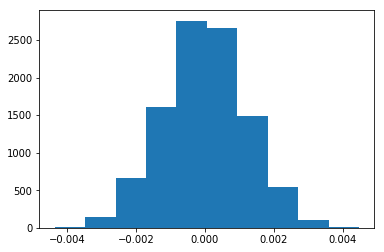

In [51]:
# converting p_diffs into numpy array
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [65]:
(p_diffs > obs_diff).mean()

0.90329999999999999

In [52]:
#Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), 10000)

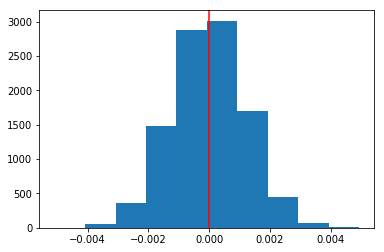

In [53]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(x=obs_diff, color = 'red');

In [67]:
# Compute p-value
(null_vals > obs_diff).mean()

0.90290000000000004

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### Answer
Computed the p-value above. If the p-value is large (closer or equal to 1) then it suggest that we reject null hypothesis, H<sub>0</sub> and if it is small, (closer or equal to 0), then it suggest that we fail to reject null hypothesis.<br>
Since p-value is 0.90, and the given threshhold error rate of 5% (0.05), 
0.90 > 0.05, we fail to reject the null hypothesis.<br>
It suggest that we are most likely to stay with H<sub>0</sub>, which says that new page and old page have the same conversion rates.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [69]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].count()
convert_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].count()
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
n_new = df2.query('landing_page == "new_page"')['user_id'].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [75]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

In [76]:
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### Answer
*Reference for z-score explanation http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm*
<li>The z-score is 1.31, which is -1.96 < 1.31 < +1.96, which means the z-score falls in the bell curve and p-value is 0.90 > 0.05, which states that we fail to reject null hypothesis, which means that old page and new page have the same conversion rates.</li>
<li>The findings for p-value matches in both the sections, which says that since p-value of ~0.9 > 0.05 (5%) threshhold error rate, we fail to reject the null hypothesis.</li>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Answer
Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# Creating dummy variables for landing page
df2[['ab_page', 'ab_page1']] = pd.get_dummies(df2['landing_page'])
df2 = df2.drop('ab_page1', axis = 1)

In [38]:
# Adding an intercept column to the dataframe
df2['intercept'] = 1

In [39]:
# Checking the dataframe for the changes made
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [40]:
# Fitting the Logistic Regression Modal
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        01:19:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [41]:
# Exponentiating the coefficient for ab_page
np.exp(-0.0150)

0.98511193960306265

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

<li>Number of rows the modal predicted is 290584.</li>

<li>A user is 0.985 times more likely to be converted if the page is new page.</li>
<li>p-value associated with ab_page is 0.190 > 0.05, so there's no statistically significant relationship between variable and the response variable. </li>
<li>LLR p-value is 0.1899 ~ 0.19 > 0.05, so we fail to reject null hypothesis</li>
<li>Fail to reject null hypothesis. </li>

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### Answer
The p-value associated with ab_page is 0.190 > 0.05.<br> 
so ab_page is not statistically significant variable for the dependant variable converted.<br>
Since the independant varible (X) is not statistically significant, it does not predict the dependant variable (Y). <br>


Logistic regression model assumes null hypothesis to be <br> **H<sub>0</sub> : there is no relationship between the dependant variable (Y) and independant variables (X).**<br>
Alternative hypothesis for logistic regression model <br> **H<sub>1</sub> : dependant variable (Y) is predicted by independant variables (X).**
<br>
In A/B Test we test if any page have higher or lower conversion rate, so it is one-tailed test.<br>
But for Logistic Regression model, we only test if an independant or predictor variable (X) does have any kind of effect on the dependant or response variable, so it's a two-tail test.<br>
The p-value from A/B Test is ~ 0.9 & the p-value from the regression model is 0.19, there's a significant difference in two values. <br>
Since regression model is a two tail test, so p-value of 0.19 when cut into half 0.19 / 2 = 0.095 gives one tail value, and since 1 is the probability of an event occuring 1 - 0.095 = 0.905 which is the p-value from A/B test which is one tail test.<br>
So the p-value differs in A/B test from Regression Model.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<li>Multiple logistic regression model gives the flexibility to add multiple independant variables to predict a dependant variable outcome.</li>
<li>There's no disadvantages to adding additional terms in regression model, if the independant variables are not corelated to each other or in other words there's no multicollinearity.</li>
<li>But adding too many independant varibales or irrelevant variables doesn't improve the quality of the model, in fact it decreases the quality of the variable.</li>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [42]:
# Read countries.csv file into a dataframe
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
# Checking for any missing values
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [44]:
# Checking for any duplicate user_id values
df_country.nunique()

user_id    290584
country         3
dtype: int64

In [45]:
# Joining the country dataframe and the page dataframe on user_id
df3 = df2.join(df_country.set_index('user_id'), on = 'user_id')

In [46]:
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [47]:
# Creating dummy variables for country
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
# Dropping US column to consider it as baseline
df3 = df3.drop('US', axis = 1)

In [48]:
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0


In [49]:
# Fitting logistic regression model with only country variable
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:               1.521e-05
Time:                        01:35:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [50]:
np.exp(-0.0408), np.exp(0.0099)

(0.96002111497165088, 1.0099491671175422)

<li>A user is 0.96 times more likely to be converted if he lives in CA as compared to if he lives in US.</li>
<li>A user is 1.01 times more likely to be converted if he lives in UK as compared to if he lives in US.</li>
<li>p-value for CA, UK > 0.05, so there is no statistically 
significant relationship between the country and converted. <br></li>
<li>LLR p-value is 0.1984 > 0.05, so we fail to reject the null hypothesis.</li>
<li>Fail to reject the null hypothesis, dependant variable (Y) is not predicted by the independant variable (X). </li>


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
# Fitting logistic regression model with country and ab_page
logit_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:               2.323e-05
Time:                        01:35:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [52]:
np.exp(-0.0149), np.exp(-0.0408), np.exp(0.0099)

(0.9852104557227469, 0.96002111497165088, 1.0099491671175422)

<li>p-value for ab_page, CA, UK 0.191, 0.130, 0.457 > 0.05, so there's no statistically significant relationship between dependant and the independant variables.</li>
<li>A user is 0.98 times more likely to be converted if he receives a new page holding all other variables constant.</li>
<li>A user is 0.96 times more likely to be converted if he lives in CA holding all other variables canstant.</li>
<li>A user is 1.01 times more likely to be converted if he lives in UK holding all other vriables constant.</li>
<li>LLR p-value is 0.1760 > 0.05 (5%), so fail to reject null hypothesis. </li>

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0